In [1]:
from KRZmetric import *
import numpy as np

In [39]:
M=2e5+10
spin=0.300
e=0.5
p=6

In [40]:
def getfreq_sec_fromepma(e,p,M,spin):

    omg=np.array(getfreq_dt_fromepa(e,p,spin))
    ########转换单位
    Grav=6.674e-11 #引力常数
    clight=2.998e8 #光速
    Msol=1.989e30  #太阳质量，以千克做单位

    #把频率换成s^-1
    omgsec=omg*clight**3/M/Msol/Grav
    return omgsec
omgr,omgphi=getfreq_sec_fromepma(e,p,M,spin)

In [24]:
filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,0,e,p)
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


In [25]:
def getfreq_sec_frommaxi(t,r,phi,M):

    omgavg=np.array(getfreq_dt_frommaxi(t,r,phi))
    ########转换单位
    Grav=6.674e-11 #引力常数
    clight=2.998e8 #光速
    Msol=1.989e30  #太阳质量，以千克做单位

    #把频率换成s^-1
    omgavgsec=omgavg*clight**3/M/Msol/Grav
    return omgavgsec

print(getfreq_sec_frommaxi(t,r,phi,M))
#print(omgavg)

[ 0.01940541  0.06231897]


In [41]:
omgr,omgphi

(0.019405285183499713, 0.062313002793882778)

In [43]:
#试试解M=2e5, d1=0.2, spin=0.5, e=0.5, p=6的角频率对应Kerr的M，spin是多少
M=2e5
spin=0.500
e=0.5
p=6
d1=0.2

filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,d1,e,p)
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


In [50]:
avgomgsec=getfreq_sec_frommaxi(t,r,phi,M)
print(avgomgsec)
avgomgr=avgomgsec[0]
avgomgphi=avgomgsec[1]

[ 0.02718257  0.0507639 ]


In [54]:
def fun(x):
    print('called')
    M=x[0]
    spin=x[1]
    print('e=%f, p=%f, M=%f, spin=%f, aimomgr=%f, aimomgphi=%f'%(e,p,M,spin,avgomgr,avgomgphi))
    
    omgr,omgphi=getfreq_sec_fromepma(e,p,M,spin)
    avgomgsec=np.array([avgomgr,avgomgphi])
    omgsec=np.array([omgr,omgphi])
    return (omgsec-avgomgsec)/avgomgsec

In [55]:

from scipy.optimize import root,fsolve
(myM,myspin)=fsolve(fun,[M,spin])

called
e=0.500000, p=6.000000, M=200000.000000, spin=0.500000, aimomgr=0.027183, aimomgphi=0.050764
called
e=0.500000, p=6.000000, M=200000.000000, spin=0.500000, aimomgr=0.027183, aimomgphi=0.050764
called
e=0.500000, p=6.000000, M=200000.000000, spin=0.500000, aimomgr=0.027183, aimomgphi=0.050764
called
e=0.500000, p=6.000000, M=200000.002980, spin=0.500000, aimomgr=0.027183, aimomgphi=0.050764
called
e=0.500000, p=6.000000, M=200000.000000, spin=0.500000, aimomgr=0.027183, aimomgphi=0.050764
called
e=0.500000, p=6.000000, M=200615.694108, spin=0.600464, aimomgr=0.027183, aimomgphi=0.050764
called
e=0.500000, p=6.000000, M=200970.311382, spin=0.615032, aimomgr=0.027183, aimomgphi=0.050764
called
e=0.500000, p=6.000000, M=201017.339238, spin=0.617450, aimomgr=0.027183, aimomgphi=0.050764
called
e=0.500000, p=6.000000, M=201018.115673, spin=0.617496, aimomgr=0.027183, aimomgphi=0.050764
called
e=0.500000, p=6.000000, M=201018.117240, spin=0.617496, aimomgr=0.027183, aimomgphi=0.050764


In [56]:
getfreq_sec_fromepma(e,p,myM,myspin)

array([ 0.02718257,  0.0507639 ])

In [57]:
avgomgsec

array([ 0.02718257,  0.0507639 ])

In [60]:
M=myM
spin=myspin
e=0.5
p=6
d1=0

filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,d1,e,p)
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


In [62]:
bestkerromgsec=getfreq_sec_frommaxi(t,r,phi,M)
bestkerromgsec

array([ 0.0271823 ,  0.05076356])

In [63]:

M=2e5
spin=0.500
e=0.5
p=6
d1=0.2

filenamekrz='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,d1,e,p)
#index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)

M=myM
spin=myspin
e=0.5
p=6
d1=0

filenamekerr='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,d1,e,p)
#index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


In [64]:

#Observation angle, will be used to transform hbar to hTT 
PHI=0/180*np.pi  #azimuthal angle, in rad
THETA=45/180*np.pi  #latitude angle, in rad
kerrwave=getwave(filenamekerr,THETA,PHI)
krzwave=getwave(filenamekrz,THETA,PHI)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(98000, 100000)

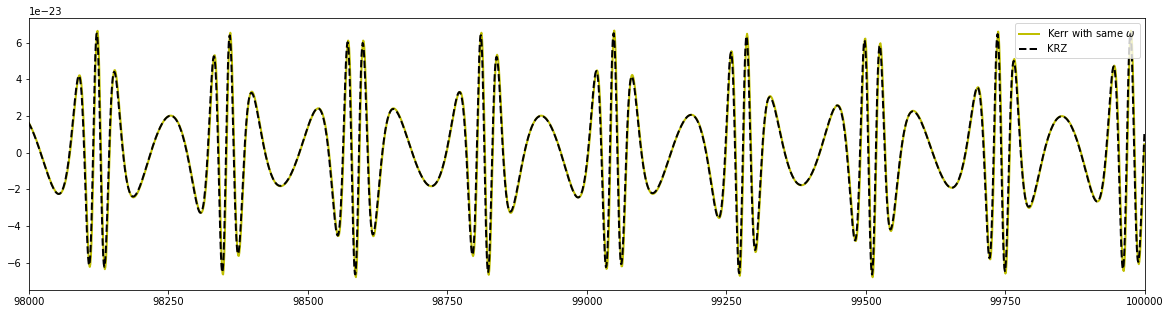

In [86]:

import matplotlib.pyplot as plt
plt.figure(figsize=[20,5])
plt.plot(np.arange(100000),kerrwave[1],'y',label='Kerr with same $\\omega$',linewidth=2)
plt.plot(np.arange(100000),krzwave[1],'k--',label='KRZ',linewidth=2)
plt.legend()
plt.xlim(98000,100000)

In [77]:
bracket(kerrwave[1],krzwave[1],1)/np.sqrt( bracket(kerrwave[1],kerrwave[1],1)*bracket(krzwave[1],krzwave[1],1) )

0.99791139261294637